## Value 

#### Background

##### We are a portfolio investment company and we make investments in the emerging markets around the world. Our company profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles.

##### Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.

#### Data Description

##### You are given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. Use only 2020 data and predict with 2021 Q1 data.

#### Goal

##### Predict stock price valuations on a daily, weekly and monthly basis. Recommend BUY, HOLD, SELL decisions. Maximize capital returns, minimize losses. Ideally a loss should never happen. Minimize HOLD period.

#### Success Metrics

##### Evaluate on the basis of capital returns. Use Bollinger Bands to measure your systems effectiveness.

In [1]:
#Import the libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import datetime as dt
import urllib.request, json
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA 
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#importing functions and parameters files
from functions import preprocess_dataframe, plot_stock_data, candlestick_volume, draw_boxplots 
from functions import linear_regression_forecast, arima, sarimax_forecast, prophet_forecast
from functions import arima_monthly, sarimax_forecast_monthly, prophet_forecast_monthly
from functions import preprocess_and_resample, sarimax_recommend, lr_recommend, prophet_recommend

In [2]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
# Display the columns
russia.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,291.02,294,294.42,290.26,47.00M,-0.0076
1,2021-03-30 00:00:00,293.25,294.86,295.72,291.5,38.81M,-0.0002
2,2021-03-29 00:00:00,293.3,289.72,294.09,289.26,43.68M,0.0071
3,2021-03-26 00:00:00,291.22,288.63,292.75,288.32,56.07M,0.0159
4,2021-03-25 00:00:00,286.66,286.5,287.03,283.85,35.22M,0.0030


In [3]:
russia.shape

(312, 7)

In [4]:
russia.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [5]:
russia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      312 non-null    object 
 1   Price     312 non-null    object 
 2   Open      312 non-null    object 
 3   High      312 non-null    object 
 4   Low       312 non-null    object 
 5   Vol.      311 non-null    object 
 6   Change %  311 non-null    float64
dtypes: float64(1), object(6)
memory usage: 17.2+ KB


In [6]:
#Check index type
russia.index.dtype

dtype('int64')

In [7]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
turkey=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Turkey - Koc Holding AS (KCHOL)', parse_dates = True)
# Display the columns
turkey.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,19.41,19.42,19.63,19.27,13.14M,-0.0046
1,2021-03-30 00:00:00,19.5,19.12,19.81,19.03,21.05M,0.0209
2,2021-03-29 00:00:00,19.1,19.24,19.67,19.1,16.56M,-0.0078
3,2021-03-26 00:00:00,19.25,20.28,20.36,19.1,21.35M,-0.0385
4,2021-03-25 00:00:00,20.02,20.5,20.86,20.02,15.93M,-0.0148


In [8]:
turkey.shape

(316, 7)

In [9]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
egypt=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Egypt - Medinet Nasr Housing (M', parse_dates = True)
# Display the columns
egypt.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,3.75,3.74,3.82,3.71,1.57M,0.0054
1,2021-03-30 00:00:00,3.73,3.71,3.76,3.67,3.43M,0.0081
2,2021-03-29 00:00:00,3.7,3.69,3.73,3.68,1.25M,-0.0027
3,2021-03-28 00:00:00,3.71,3.76,3.76,3.68,2.34M,0.0000
4,2021-03-25 00:00:00,3.71,3.62,3.78,3.59,2.50M,0.0137


In [10]:
egypt.shape

(306, 7)

In [11]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
brazil=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Brazil - Minerva SABrazil (BEEF', parse_dates = True)
# Display the columns
brazil.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,10.2,10.35,10.4,10.12,7.77M,-0.0154
1,2021-03-30 00:00:00,10.36,10.41,10.62,10.3,9.93M,-0.0105
2,2021-03-29 00:00:00,10.47,9.85,10.5,9.81,22.04M,0.0651
3,2021-03-26 00:00:00,9.83,9.8,9.94,9.7,5.11M,0.0031
4,2021-03-25 00:00:00,9.8,10.01,10.01,9.66,8.88M,-0.0151


In [12]:
brazil.shape

(310, 7)

In [13]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
argentina=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Argentina - Pampa Energia SA (P', parse_dates = True)
# Display the columns
argentina.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,85.15,86.5,88.1,85.15,564.30K,-0.0110
1,2021-03-30 00:00:00,86.1,85.15,86.75,84.6,141.40K,0.0129
2,2021-03-29 00:00:00,85,80,86,79,371.22K,0.0385
3,2021-03-26 00:00:00,81.85,84,84.6,80.7,462.55K,-0.0209
4,2021-03-25 00:00:00,83.6,85.2,87.3,82.1,389.78K,-0.0313


In [14]:
argentina.shape

(301, 7)

In [15]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
colombia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Colombia - Cementos Argos SA (C', parse_dates = True)
# Display the columns
colombia.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,5150,5100,5170,5100,212.44K,0.0098
1,2021-03-30 00:00:00,5100,5010,5100,5010,583.70K,0.0109
2,2021-03-29 00:00:00,5045,5020,5045,5015,117.54K,0.0050
3,2021-03-26 00:00:00,5020,5085,5085,4980,203.46K,-0.0020
4,2021-03-25 00:00:00,5030,5035,5045,4950,317.06K,0.0010


In [16]:
colombia.shape

(304, 7)

In [17]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
safrica=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Africa - Impala Platinum ', parse_dates = True)
# Display the columns
safrica.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,27373,26980,27526,26657,2.49M,0.0177
1,2021-03-30 00:00:00,26898,26766,27443,26360,3.02M,-0.0030
2,2021-03-29 00:00:00,26980,27800,28174,26614,4.44M,-0.0201
3,2021-03-26 00:00:00,27533,27083,28006,26728,3.36M,0.0365
4,2021-03-25 00:00:00,26564,25954,27128,25954,2.83M,0.0255


In [18]:
safrica.shape

(315, 7)

In [19]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
skorea=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Korea - Dongkuk Steel Mil', parse_dates = True)
# Display the columns
skorea.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,13650,13700,13750,13450,0.19K,0.0000
1,2021-03-30 00:00:00,13650,13850,14200,13050,3.17M,0.0074
2,2021-03-29 00:00:00,13550,12500,13800,12500,0.20K,0.1107
3,2021-03-28 00:00:00,12200,12200,12200,12200,-,0.0000
4,2021-03-26 00:00:00,12200,11500,12300,11350,2.34M,0.0796


In [20]:
skorea.shape

(342, 7)

##### Data Exploration

##### We will convert the volume column to millions and also add a year and a month column for more analysis.

In [21]:
russia=preprocess_dataframe(russia)
russia.head()

,Date,Price,Open,High,Low,Change %,Volume (M),Year,Month
0,2020-01-03,255.00,255.99,258.19,253.7,0.0010,35.85,2020,1
1,2020-01-06,253.90,254.75,254.84,251.4,-0.0043,22.35,2020,1
2,2020-01-08,259.15,253.57,259.15,253.03,0.0207,40.82,2020,1
3,2020-01-09,257.99,259.4,261.76,257.01,-0.0045,38.33,2020,1
4,2020-01-10,258.19,257.86,259.25,256.88,0.0008,18.85,2020,1


In [22]:
#Do the same for all dataframes
turkey = preprocess_dataframe(turkey)
turkey.head()

,Date,Price,Open,High,Low,Change %,Volume (M),Year,Month
0,2020-01-02,20.38,20.42,20.44,20.24,0.0030,2.53,2020,1
1,2020-01-03,20.30,20.3,20.44,19.97,-0.0039,3.31,2020,1
2,2020-01-06,20.08,20.34,20.34,19.97,-0.0108,1.94,2020,1
3,2020-01-07,19.93,20.22,20.28,19.92,-0.0075,2.89,2020,1
4,2020-01-08,19.94,19.89,19.95,19.66,0.0005,2.79,2020,1


In [23]:
egypt = preprocess_dataframe(egypt)
egypt.head()

,Date,Price,Open,High,Low,Change %,Volume (M),Year,Month
0,2020-01-02,4.81,4.81,4.87,4.78,-0.0021,0.000242,2020,1
1,2020-01-05,4.41,4.7,4.7,4.33,-0.0832,3.760000,2020,1
2,2020-01-06,4.28,4.16,4.44,4.12,-0.0295,2.520000,2020,1
3,2020-01-08,4.41,4.19,4.59,4.15,0.0304,3.520000,2020,1
4,2020-01-09,4.62,4.55,4.7,4.55,0.0476,2.090000,2020,1


In [24]:
brazil = preprocess_dataframe(brazil)
brazil.head()

,Date,Price,Open,High,Low,Change %,Volume (M),Year,Month
0,2020-01-02,12.57,12.88,12.99,12.57,-0.0210,5.78,2020,1
1,2020-01-03,12.90,12.45,12.93,12.27,0.0263,4.88,2020,1
2,2020-01-06,12.89,12.9,12.91,12.57,-0.0008,4.17,2020,1
3,2020-01-07,13.48,13.03,13.48,13.03,0.0458,8.20,2020,1
4,2020-01-08,13.63,13.5,13.68,13.18,0.0111,6.18,2020,1


In [25]:
argentina = preprocess_dataframe(argentina)
argentina.head()

,Date,Price,Open,High,Low,Change %,Volume (M),Year,Month
0,2020-01-02,48.25,49.35,50.2,47.55,-0.0292,0.000878,2020,1
1,2020-01-03,48.80,48.25,49.45,46.5,0.0114,0.000595,2020,1
2,2020-01-06,48.50,48.4,48.7,47,-0.0061,0.000719,2020,1
3,2020-01-07,47.60,48.35,49,46.9,-0.0186,0.000902,2020,1
4,2020-01-08,46.50,47.5,47.5,46,-0.0231,1.180000,2020,1


In [26]:
colombia = preprocess_dataframe(colombia)
colombia.head()

,Date,Price,Open,High,Low,Change %,Volume (M),Year,Month
0,2020-01-02,7120.0,7300,7300,7120,-0.0247,0.000139,2020,1
1,2020-01-03,7000.0,7040,7100,6960,-0.0169,0.000471,2020,1
2,2020-01-07,6950.0,6950,6950,6850,-0.0071,0.000169,2020,1
3,2020-01-08,6880.0,6940,6950,6880,-0.0101,0.000085,2020,1
4,2020-01-09,6810.0,6880,6890,6800,-0.0102,0.000263,2020,1


In [27]:
safrica = preprocess_dataframe(safrica)
safrica.head()

,Date,Price,Open,High,Low,Change %,Volume (M),Year,Month
0,2020-01-02,14330.0,14525,14764,14325,-0.0015,2.01,2020,1
1,2020-01-03,14843.0,14700,14884,14360,0.0358,3.19,2020,1
2,2020-01-06,14620.0,14985,15045,14574,-0.0150,2.61,2020,1
3,2020-01-07,14500.0,14688,14688,13940,-0.0082,3.94,2020,1
4,2020-01-08,15290.0,14775,15465,14468,0.0545,6.24,2020,1


In [28]:
skorea = preprocess_dataframe(skorea)
skorea.head()


,Date,Price,Open,High,Low,Change %,Volume (M),Year,Month
0,2020-01-02,5850.0,5930,5980,5820,-0.0168,0.000240,2020,1
1,2020-01-03,5900.0,5870,5920,5830,0.0085,0.000230,2020,1
2,2020-01-06,5730.0,5890,5890,5680,-0.0288,0.000320,2020,1
3,2020-01-07,5690.0,5740,5770,5650,-0.0070,0.000304,2020,1
4,2020-01-08,5430.0,5640,5640,5390,-0.0457,0.000524,2020,1


##### Data Visualization

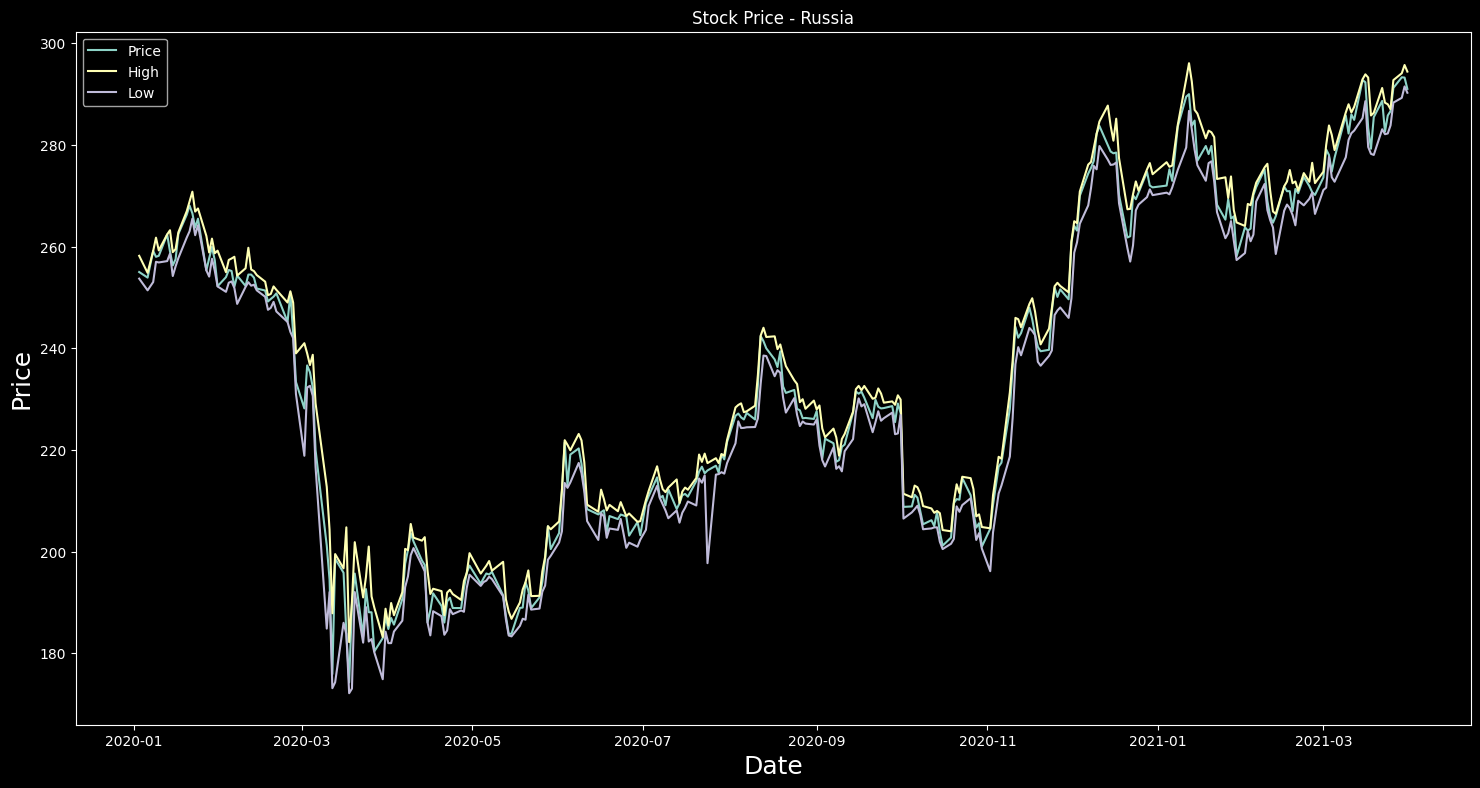

In [29]:
plot_stock_data(russia, "Russia")
candlestick_volume(russia, "Russia")

##### There doesn't seem to be any specific pattern in the Russia market other than the price has been trending up even since March 2020 which is when the COVID-19 pandemic started. The volume is highest around March 2020 and November 2020.

In [30]:
#plot_stock_data(turkey, "Turkey")
#candlestick_volume(turkey, "Turkey")

In [31]:
#plot_stock_data(egypt, "Egypt")
#candlestick_volume(egypt, "Egypt")

In [32]:
#plot_stock_data(brazil, "Brazil")
#candlestick_volume(brazil, "Brazil")

In [33]:
#plot_stock_data(argentina, "Argentina")
#candlestick_volume(argentina, "Argentina")

In [34]:
#plot_stock_data(colombia, "Colombia")
#candlestick_volume(colombia, "Colombia")

In [35]:
#plot_stock_data(safrica, "South Africa")
#candlestick_volume(safrica, "South Africa")

In [36]:
#plot_stock_data(skorea, "South Korea")
#candlestick_volume(skorea, "South Korea")

In [37]:
#draw_boxplots(russia, "Russia")

In [38]:
#draw_boxplots(turkey, "Turkey")

In [39]:
#draw_boxplots(egypt, "Egypt")

In [40]:
#draw_boxplots(brazil, "Brazil")

In [41]:
#draw_boxplots(argentina, "Argentina")

In [42]:
#draw_boxplots(colombia, "Colombia")

In [43]:
#draw_boxplots(safrica, "South Africa")

In [44]:
#draw_boxplots(skorea, "South Korea")

##### Data Modeling

##### We will used different models (Linear Regression, ARIMA, SARIMAX, fbprophet, Keras LSTM) in order to determine which is best in order to predict future prices.

##### We will use the Root Mean Squared (RMSE) and the mean absolute percentage erro (MAPE) in order to determine the goodness of fit. RMSE is one of the two main performance indicators for a regression model. It measures the average difference between values predicted by a model and the actual values. MAPE expresses accurary as the ratio of the absolute value of the difference between actual and forecasted value divided by the actual value. The absolute value of this ratio is summed for every forecasted point in time and divided by the number of fitted points n.

##### Bollinger Bands are composed of three lines. One of the more common calculations uses a 20-day simple moving average (SMA) for the middle band. The upper band is calculated by taking the middle band and adding twice the daily standard deviation to that amount. The lower band is calculated by taking the middle band and subtracting twice the daily standard deviation.

##### A common approach when using Bollinger Bands® is to identify overbought or oversold market conditions. When the price of the asset breaks below the lower band of the Bollinger Bands, it suggests that prices have perhaps fallen too much and are due to bounce. Conversely, when the price breaks above the upper band, it indicates that the market may be overbought and due for a pullback.

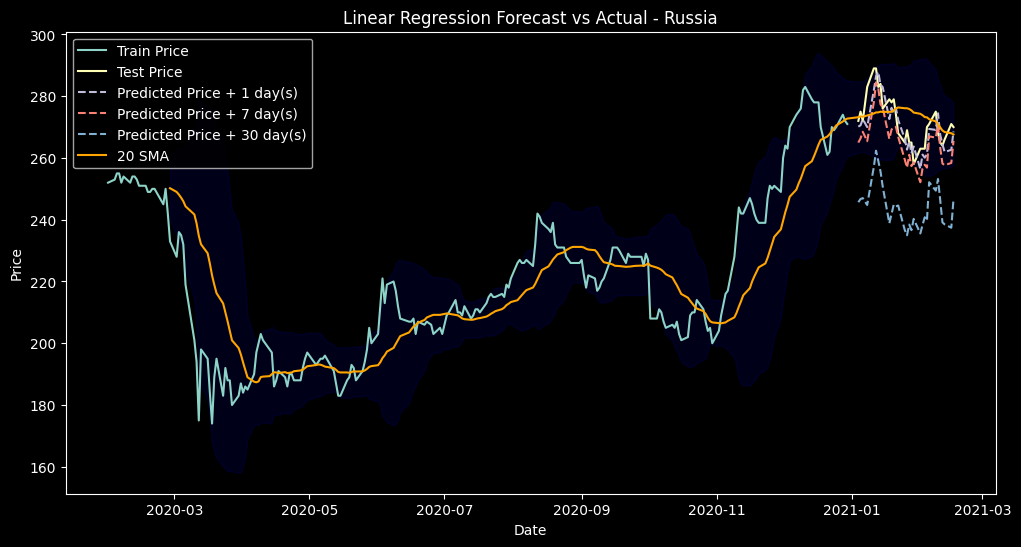

Lead 1 day(s):
Root Mean Squared Error: 6.5864030720431295
Mean Absolute Percentage Error: 1.916420303821621%

Lead 7 day(s):
Root Mean Squared Error: 10.339535411053722
Mean Absolute Percentage Error: 3.4034178704668396%

Lead 30 day(s):
Root Mean Squared Error: 38.02261736622015
Mean Absolute Percentage Error: 12.554598267545655%



In [45]:
linear_regression_forecast(russia, "Russia")

In [46]:
#linear_regression_forecast(turkey, "Turkey")

In [47]:
#linear_regression_forecast(egypt, "Egypt")

In [48]:
#linear_regression_forecast(brazil, "Brazil")

In [49]:
#linear_regression_forecast(argentina, "Argentina")

In [50]:
#linear_regression_forecast(colombia, "Colombia")

In [51]:
#linear_regression_forecast(safrica, "South Africa")

In [52]:
#linear_regression_forecast(skorea, "South Korea")

In [53]:
#Splitting the data into training and testing. Training data is 2020 and Testing data is 2021.
# Split the data
train_russia = russia[russia['Year'] == 2020]
test_russia = russia[russia['Year'] == 2021]

##### The ARIMA (AutoRegressive Integrated Moving Average) and SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) models are both used for time series forecasting, but they have some key differences: ARIMA handles non-seasonal data, does not handle exogenous variables and is useful for simple, non-seasonal datasets. Whereas SARIMAX handles both seasonal and non-seasonal data, can incorporate exogenous variables (regressors) which can improve the forecast by including external information and is more flexible and powerful for complex datasets with seasonality and external factors.

ADF Statistic: -1.4233235279675926
p-value: 0.5710448680935923
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-714.367, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-768.989, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-716.367, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-800.462, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-833.153, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-837.142, Time=0.12 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-837.488, Time=0.18 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-858.849, Time=0.53 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-854.015, Time=0.39 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-860.308, Time=0.60 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-860.635, Time=0.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-862

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



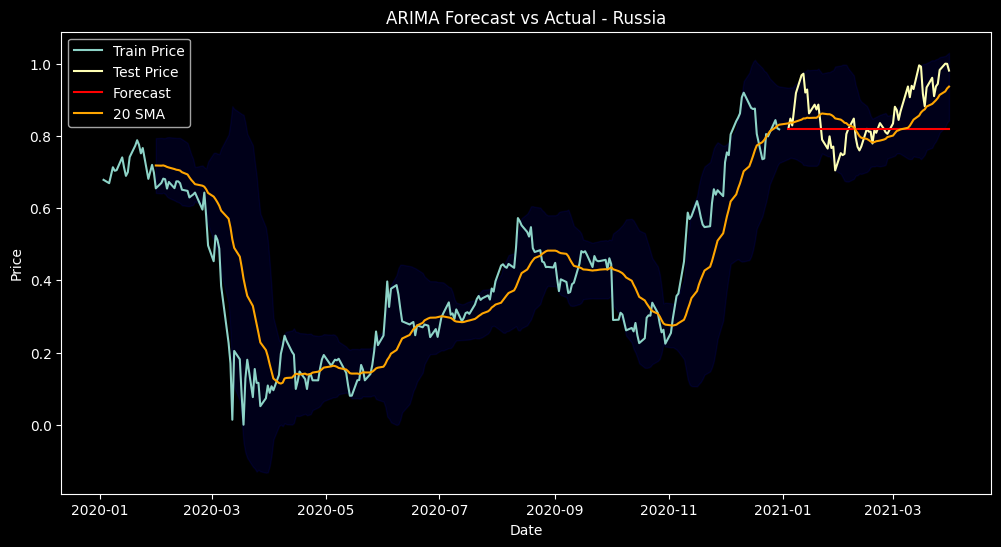

RMSE: 0.08772171000816459
MAPE: 7.681601587605252%


(0.08772171000816459, 0.07681601587605252)

In [54]:
arima(russia, "Russia")

In [55]:
#arima(turkey, 'Turkey')

In [56]:
#arima(egypt, "Egypt")

In [57]:
#arima(brazil, "Brazil")

In [58]:
#arima(argentina, "Argentina")

In [59]:
#arima(colombia, 'Colombia')

In [60]:
#arima(safrica, "South Africa")

In [61]:
#arima(skorea, "South Korea")


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1392.977, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1394.453, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1394.400, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1391.044, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1395.383, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.547 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  231
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -694.522
Date:                Thu, 13 Jun 2024   AIC                           1391.044
Time:                        17:05:19   BIC                           1394.482
Sample:                             0   HQIC                          1392.431
               

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



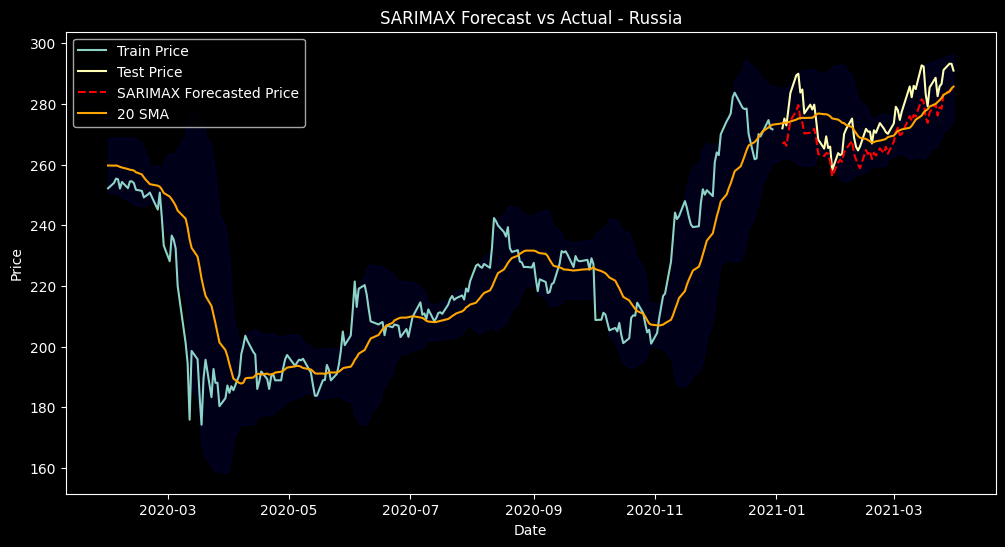

RMSE: 7.29246410672954
MAPE: 2.4778625949180966%


(7.29246410672954, 0.024778625949180965)

In [62]:
#SARIMAX
sarimax_forecast(russia, "Russia")


##### Prophet is a forecasting tool developed by Meta designed to forecast time series data as a sum of several components: trend, seasonality and holidays/events.

17:05:20 - cmdstanpy - INFO - Chain [1] start processing
17:05:20 - cmdstanpy - INFO - Chain [1] done processing


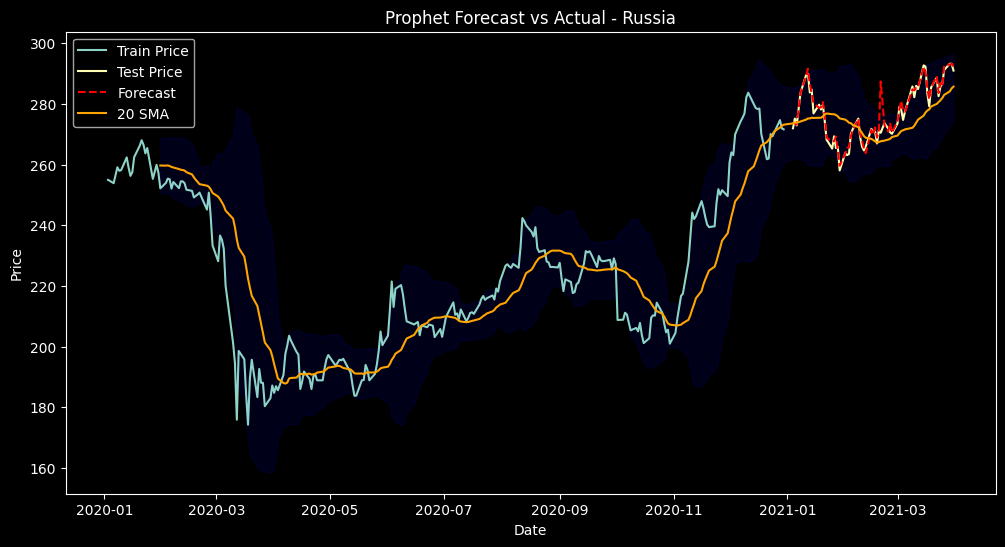

RMSE: 2.6583401196057155
MAPE: 0.5481922498521682%


(2.6583401196057155, 0.005481922498521682)

In [63]:
#Prophet
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russia=preprocess_dataframe(russia)
russia
prophet_forecast(russia, "Russia")

##### Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) are capable of learning long-term dependencies, have memory cells that can maintain information over long sequences and use gates to control the flow the information.

In [64]:
#lstm_forecast(train_russia, test_russia, seq_length=60, "Russia")

##### Weekly and Monthly Data

In [65]:
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiaw = preprocess_and_resample(russia, 'W')
russiaw['Year'] = russiaw['Date'].dt.year.astype(int)
russiaw['Month'] = russiaw['Date'].dt.month.astype(int)
print(russiaw)


         Date   Price    Open    High     Low  Volume (M)  Change %  Year  \
0  2020-01-05  255.00  255.99  258.19   253.7       35.85    0.0010  2020   
1  2020-01-12  258.19  254.75  261.76   251.4      120.35    0.0127  2020   
2  2020-01-19  262.50   258.3  263.22  254.21      191.51    0.0170  2020   
3  2020-01-26  265.49   263.2   270.8   261.8      180.10    0.0116  2020   
4  2020-02-02  252.20     261   262.1  252.17      219.33   -0.0503  2020   
..        ...     ...     ...     ...     ...         ...       ...   ...   
61 2021-03-07  277.50     273  283.83  271.13      347.35    0.0272  2021   
62 2021-03-14  284.93   278.8   288.0  277.56      226.86    0.0271  2021   
63 2021-03-21  285.47  286.05  293.88  278.03      390.40    0.0031  2021   
64 2021-03-28  291.22     285  292.75  282.11      271.22    0.0203  2021   
65 2021-04-04  291.02  289.72  295.72  289.26      129.49   -0.0007  2021   

    Month  
0       1  
1       1  
2       1  
3       1  
4       2  
.. 

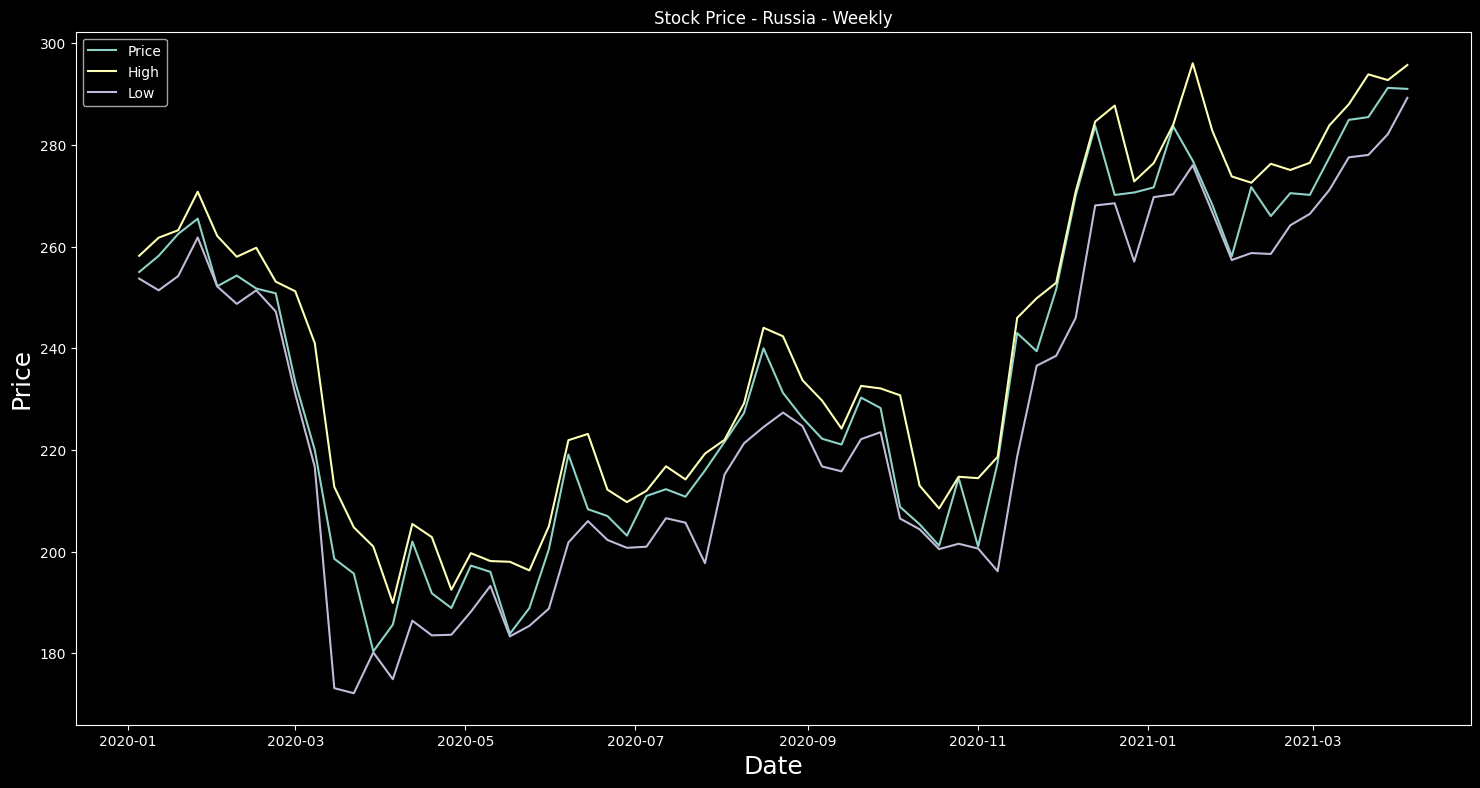

In [66]:
plot_stock_data(russiaw, "Russia - Weekly")
candlestick_volume(russiaw, "Russia - Weekly")

In [67]:
# Split the data
train_russiaw = russiaw[russiaw['Year'] == 2020]
test_russiaw = russiaw[russiaw['Year'] == 2021]

ADF Statistic: -1.1439622805197525
p-value: 0.6972258192509497
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-59.865, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-67.641, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-61.865, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-73.186, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-77.168, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-75.253, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-79.323, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-78.122, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-77.910, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-76.361, Time=0.28 sec


c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



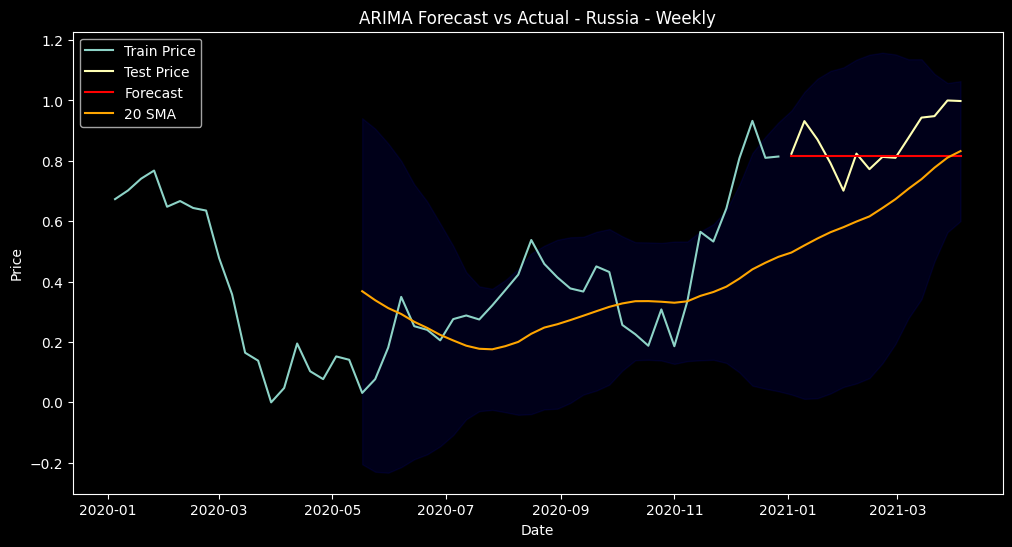

RMSE: 0.0980502255770294
MAPE: 8.360122497751922%


(0.0980502255770294, 0.08360122497751922)

In [68]:
arima(russiaw, "Russia - Weekly")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=244.961, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=246.918, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=246.907, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=245.050, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=248.698, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.313 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   33
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -120.481
Date:                Thu, 13 Jun 2024   AIC                            244.961
Time:                        17:05:24   BIC                            247.893
Sample:                    05-17-2020   HQIC                           245.933
                    

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



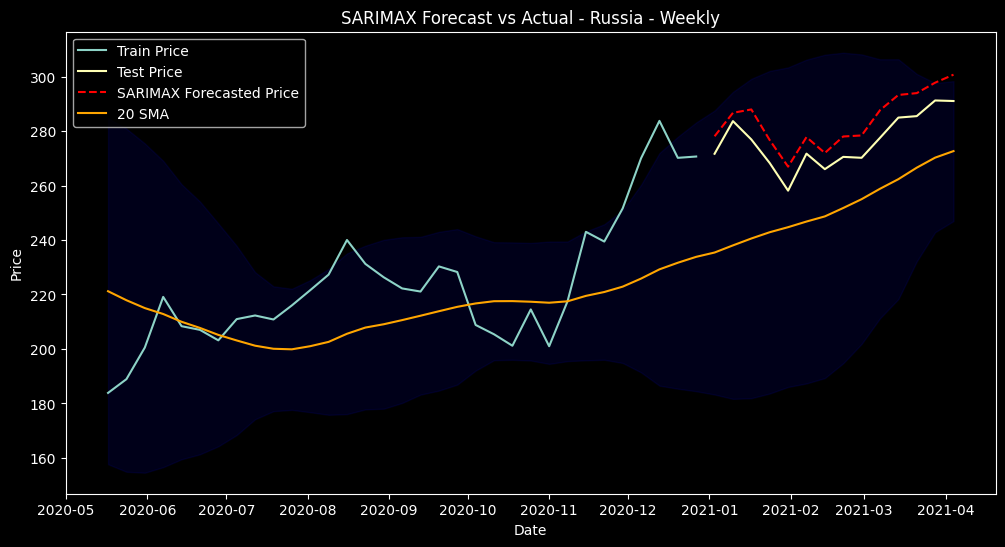

RMSE: 7.99807132771315
MAPE: 2.8099728546471665%


(7.99807132771315, 0.028099728546471664)

In [69]:
sarimax_forecast(russiaw, "Russia - Weekly")

17:05:24 - cmdstanpy - INFO - Chain [1] start processing
17:05:24 - cmdstanpy - INFO - Chain [1] done processing


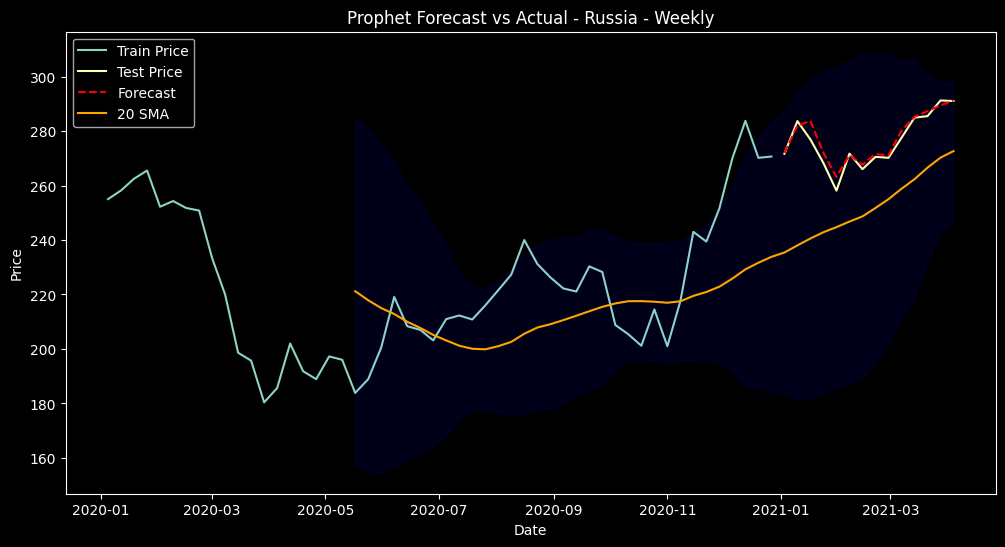

RMSE: 2.7728852124076813
MAPE: 0.7445787083605893%


(2.7728852124076813, 0.007445787083605893)

In [70]:
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiaw = preprocess_and_resample(russia, 'W')
russiaw['Year'] = russiaw['Date'].dt.year.astype(int)
russiaw['Month'] = russiaw['Date'].dt.month.astype(int)
prophet_forecast(russiaw, "Russia - Weekly")

In [71]:
# Monthly data
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiam = preprocess_and_resample(russia, 'M')
russiam['Year'] = russiam['Date'].dt.year.astype(int)
russiam['Month'] = russiam['Date'].dt.month.astype(int)
print(russiam)

         Date   Price    Open    High     Low  Volume (M)  Change %  Year  \
0  2020-01-31  252.20  255.99   270.8   251.4      747.14   -0.0080  2020   
1  2020-02-29  233.36   251.8  259.77   231.0      919.84   -0.0754  2020   
2  2020-03-31  187.21  238.93   241.0  172.15     3001.72   -0.1884  2020   
3  2020-04-30  197.25   183.2  205.44   182.0     1768.20    0.0566  2020   
4  2020-05-31  200.50  195.68   205.0  183.33     1359.04    0.0192  2020   
5  2020-06-30  203.22   203.1  223.15  200.75     1522.28    0.0181  2020   
6  2020-07-31  221.57     205  221.98  197.73     1088.09    0.0881  2020   
7  2020-08-31  226.10  222.27  244.04   221.3     1324.47    0.0226  2020   
8  2020-09-30  229.14   226.7   232.6  215.79     1402.03    0.0152  2020   
9  2020-10-31  200.99  229.08   229.9   200.5     1488.75   -0.1255  2020   
10 2020-11-30  249.63  200.45  252.88  196.15     2310.97    0.2214  2020   
11 2020-12-31  271.65  250.75  287.74   249.8     1660.36    0.0880  2020   

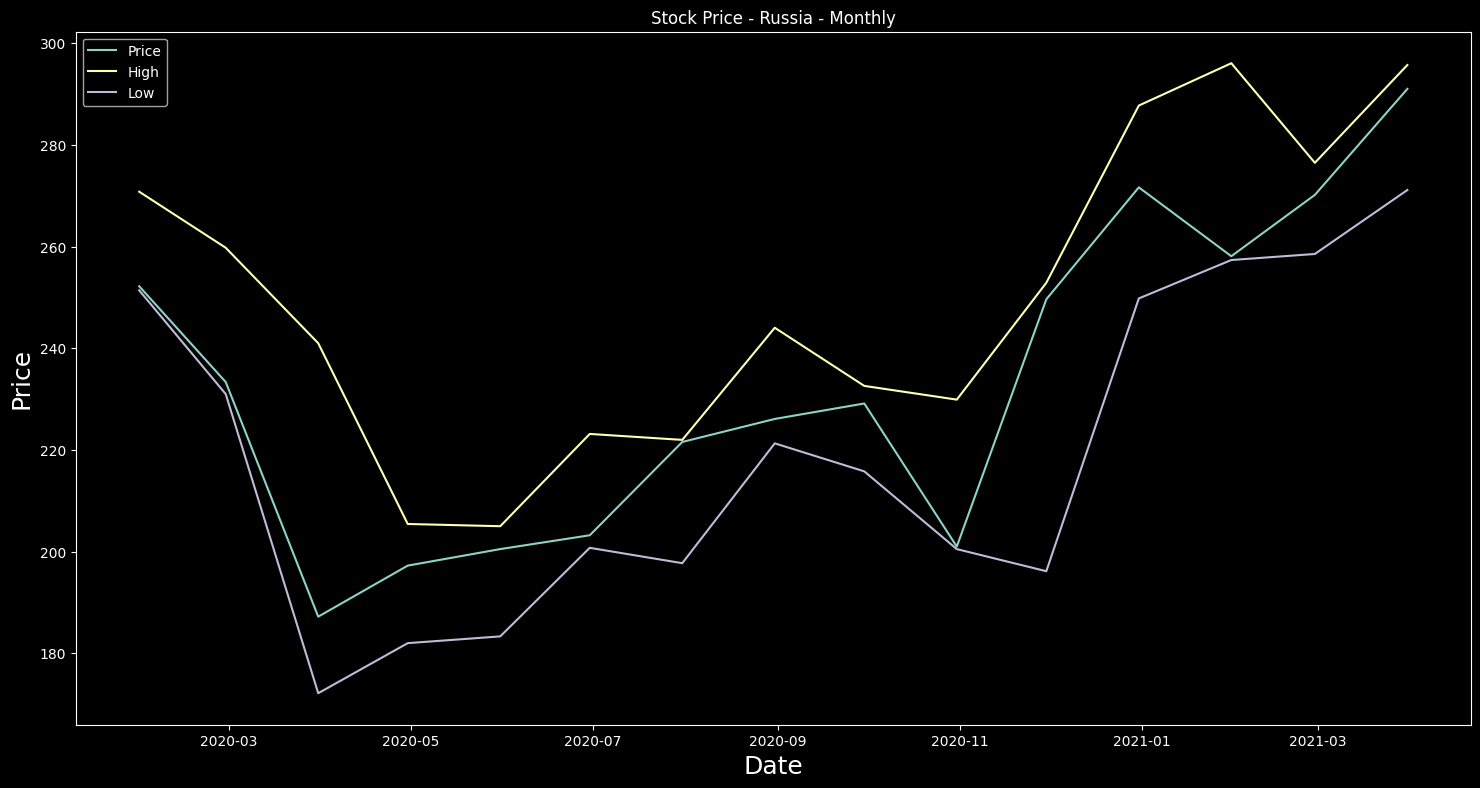

In [72]:
plot_stock_data(russiam, "Russia - Monthly")
candlestick_volume(russiam, "Russia - Monthly")

In [73]:
# Split the data
train_russiam = russiam[russiam['Year'] == 2020]
test_russiam = russiam[russiam['Year'] == 2021]

ADF Statistic: -0.12004692243057899
p-value: 0.9474048119507879
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10.259, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7.304, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8.399, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8.834, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6.714, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=8.387, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8.105, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6.160, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=8.092, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.676 seconds
    

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



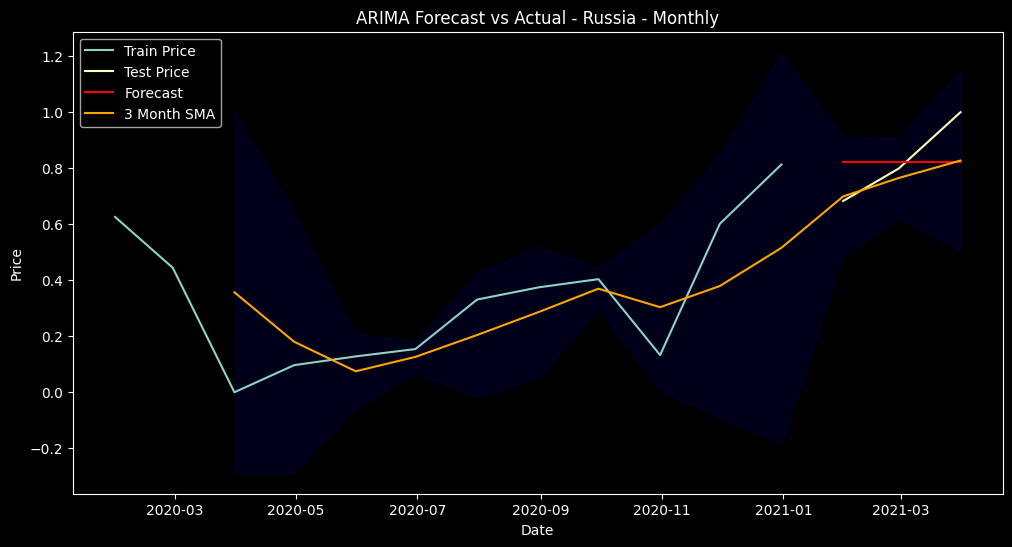

RMSE: 0.13108897664551264
MAPE: 13.637825669925629%


(0.13108897664551264, 0.1363782566992563)

In [74]:
arima_monthly(russiam, "Russia - Monthly")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=115.163, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=114.640, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=113.298, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=165.947, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=115.016, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.530 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -53.649
Date:                Thu, 13 Jun 2024   AIC                            113

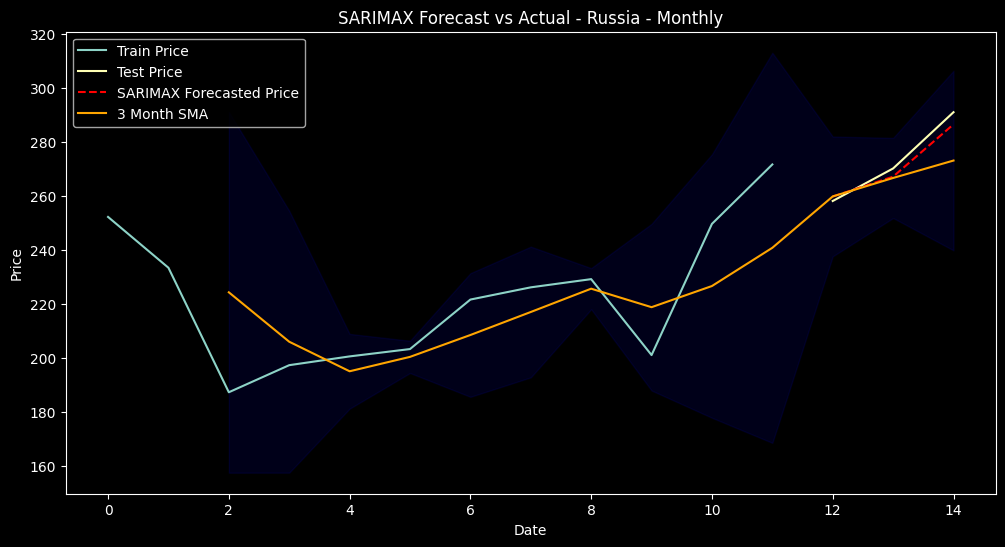

RMSE: 3.2725870102064754
MAPE: 1.1030416977119701%


(3.2725870102064754, 0.0110304169771197)

In [75]:
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiam = preprocess_and_resample(russia, 'M')
russiam['Year'] = russiam['Date'].dt.year.astype(int)
russiam['Month'] = russiam['Date'].dt.month.astype(int)
sarimax_forecast_monthly(russiam, "Russia - Monthly")

17:05:28 - cmdstanpy - INFO - Chain [1] start processing
17:05:34 - cmdstanpy - INFO - Chain [1] done processing


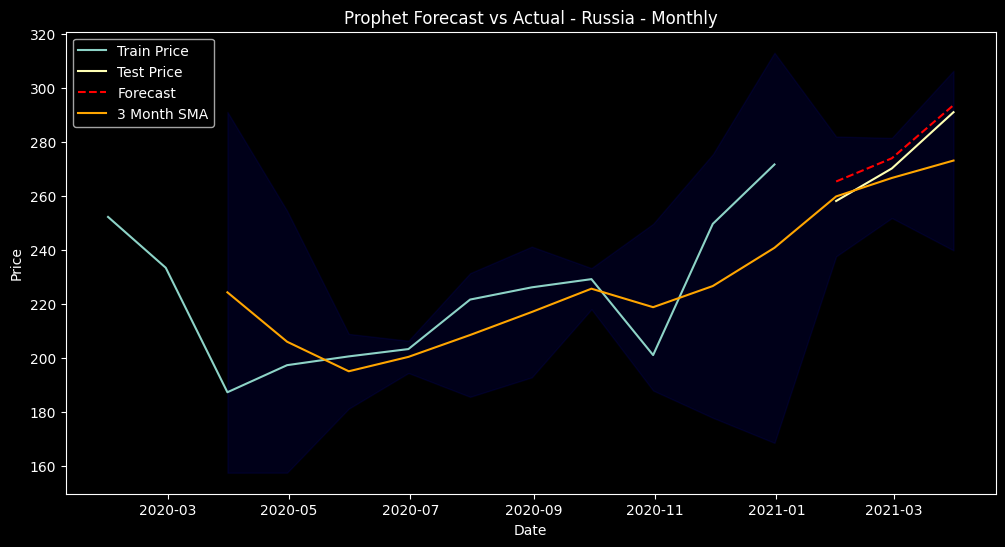

RMSE: 4.941983127908301
MAPE: 1.6981650137467257%


(4.941983127908301, 0.016981650137467257)

In [76]:
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiam = preprocess_and_resample(russia, 'M')
russiam['Year'] = russiam['Date'].dt.year.astype(int)
russiam['Month'] = russiam['Date'].dt.month.astype(int)
prophet_forecast_monthly(russiam, "Russia - Monthly")

##### Recommendation System

##### We can see that the forecasts are within the Bollinger Bands. In order to determine if we should buy or hold, we will use the Bollinger Bands. If the forecasted price touches the upper band we should sell, if it touches the lower band we should buy, otherwise we should hold.

##### Even though the ARIMA model had the lowest RMSE and MAPE values, we can see from the chart that the forecasted price is a flat line. The Prophet model had the lowest RMSE and MAPE values for the daily and weekly charts with linear regression and SARIMAX closely behind. For all of our monthly charts, we used a 3 month moving average and the forecasted price never touched the Bollinger Bands on any of our models, therefore we will not try to recommend any buying or selling for that timeframe.

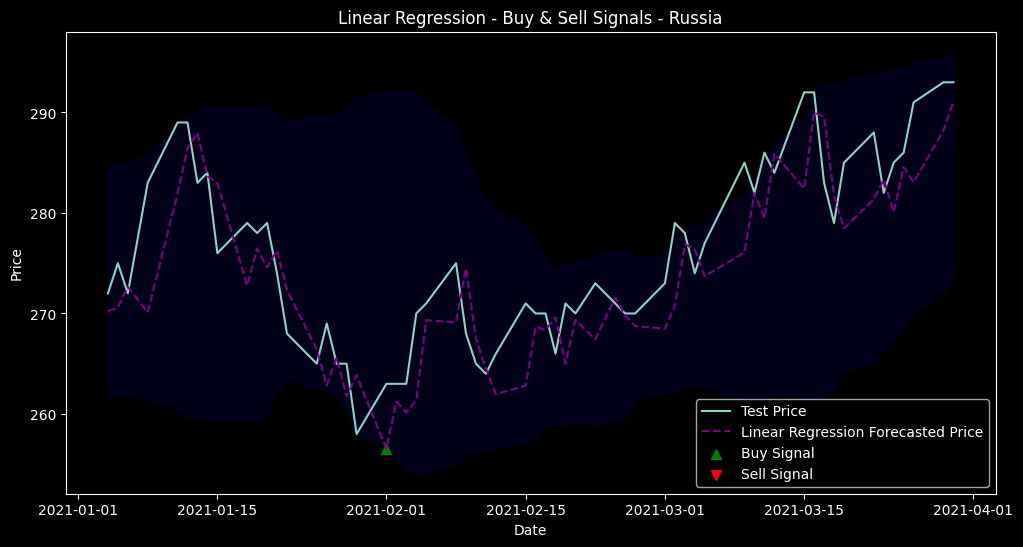

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1499.638, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1501.228, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1501.180, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1497.685, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1502.372, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.564 seconds


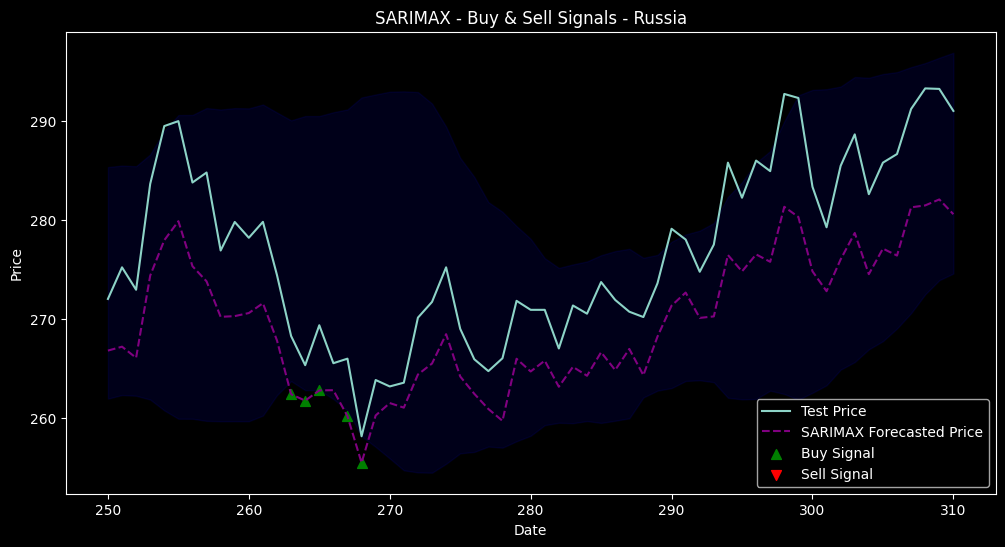

,Date,Price,Open,High,Low,Change %,Volume (M),Year,Month,Forecast,Recommendation,Upper_Band,Lower_Band
250,2021-01-04,272.00,274.67,276.60,270.61,0.0013,48.92,2021,1,266.774901,Hold,285.342686,261.914314
251,2021-01-05,275.20,272.69,275.70,270.28,0.0118,45.58,2021,1,267.172531,Hold,285.493915,262.283085
252,2021-01-06,272.93,275.94,275.94,271.62,-0.0082,40.95,2021,1,266.041879,Hold,285.427803,262.206197
253,2021-01-08,283.64,275.11,283.99,275.11,0.0392,88.93,2021,1,274.366241,Hold,286.627575,261.821425
254,2021-01-11,289.49,282.86,292.95,279.48,0.0206,112.35,2021,1,277.940919,Hold,288.987067,260.721933
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2021-03-25,286.66,286.50,287.03,283.85,0.0030,35.22,2021,3,276.388354,Hold,294.947321,269.014679
307,2021-03-26,291.22,288.63,292.75,288.32,0.0159,56.07,2021,3,281.268868,Hold,295.453327,270.559673
308,2021-03-29,293.30,289.72,294.09,289.26,0.0071,43.68,2021,3,281.463425,Hold,295.863807,272.462193
309,2021-03-30,293.25,294.86,295.72,291.50,-0.0002,38.81,2021,3,282.067065,Hold,296.399995,273.893005


In [77]:
#Daily buy and sell signals
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russia=preprocess_dataframe(russia)
lr_recommend(russia, "Russia", leads=[1])
sarimax_recommend(russia, "Russia")

17:05:36 - cmdstanpy - INFO - Chain [1] start processing
17:05:36 - cmdstanpy - INFO - Chain [1] done processing


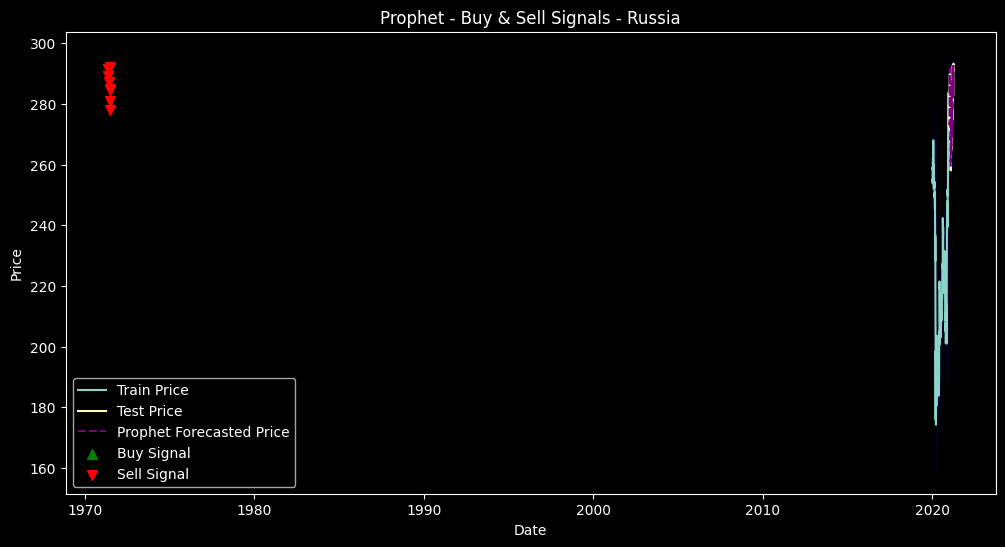

In [78]:
#Reset data for Prophet
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russia=preprocess_dataframe(russia)
prophet_recommend(russia, "Russia")

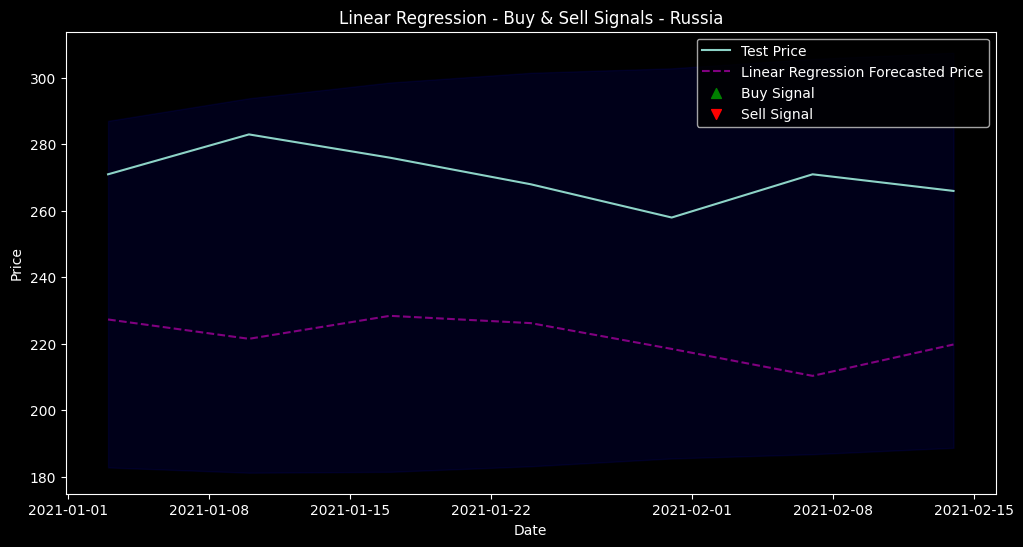

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=404.134, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=491.861, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=399.594, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=448.107, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=712.900, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=400.125, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=400.209, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=398.958, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=404.119, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=402.182, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=402.057, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=406.913, Time=0.22 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.220 seconds


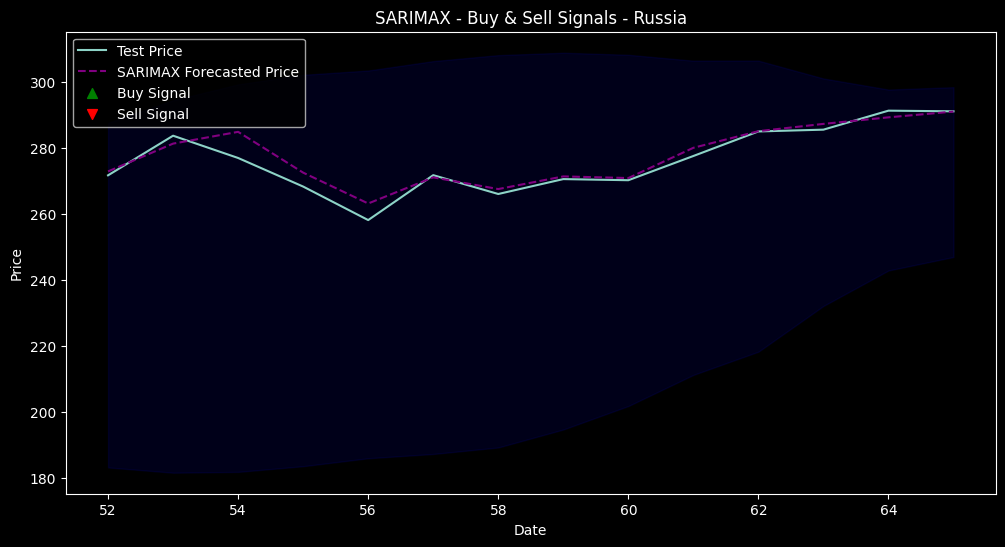

,Date,Price,Open,High,Low,Volume (M),Change %,Year,Month,Forecast,Recommendation,Upper_Band,Lower_Band
52,2021-01-03,271.65,270.90,276.43,269.73,109.59,0.0039,2021,1,272.836216,Hold,287.529692,183.256308
53,2021-01-10,283.64,274.67,283.99,270.28,224.38,0.0441,2021,1,281.246505,Hold,294.367360,181.660640
54,2021-01-17,276.90,282.86,296.07,276.00,407.31,-0.0232,2021,1,284.808803,Hold,299.180195,181.907805
55,2021-01-24,268.25,275.72,282.80,266.78,348.69,-0.0312,2021,1,272.461976,Hold,302.063652,183.628348
56,2021-01-31,258.11,271.00,273.80,257.36,491.02,-0.0379,2021,1,263.126980,Hold,303.362373,186.033627
57,2021-02-07,271.70,260.00,272.57,258.73,371.05,0.0518,2021,2,271.034313,Hold,306.209743,187.326257
58,2021-02-14,266.00,273.01,276.29,258.55,327.22,-0.0208,2021,2,267.493503,Hold,308.018519,189.293481
59,2021-02-21,270.51,268.49,275.07,264.19,325.91,0.0173,2021,2,271.322030,Hold,308.749822,194.733178
60,2021-02-28,270.17,270.10,276.48,266.43,266.93,-0.0012,2021,2,270.827244,Hold,308.129432,201.832568
61,2021-03-07,277.50,273.00,283.83,271.13,347.35,0.0272,2021,3,279.978872,Hold,306.343065,211.251935


In [79]:
#Weekly buy and sell signals
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiaw = preprocess_and_resample(russia, 'W')
russiaw['Year'] = russiaw['Date'].dt.year.astype(int)
russiaw['Month'] = russiaw['Date'].dt.month.astype(int)
lr_recommend(russiaw, "Russia", leads=[7])
sarimax_recommend(russiaw, "Russia")

17:05:39 - cmdstanpy - INFO - Chain [1] start processing
17:05:39 - cmdstanpy - INFO - Chain [1] done processing


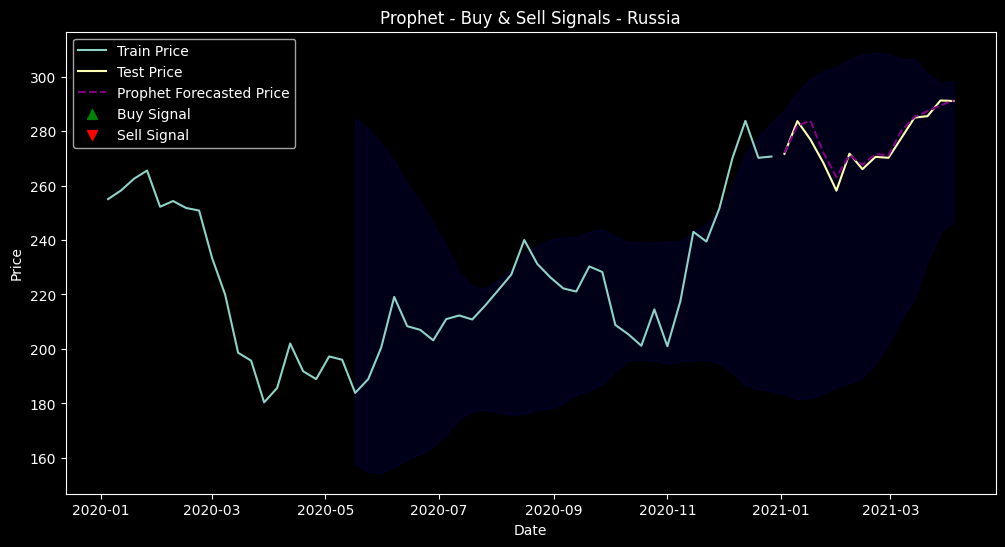

In [80]:
#Reset data for Prophet
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
russiaw = preprocess_and_resample(russia, 'W')
russiaw['Year'] = russiaw['Date'].dt.year.astype(int)
russiaw['Month'] = russiaw['Date'].dt.month.astype(int)
prophet_recommend(russiaw, "Russia")